In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from copy import deepcopy
import pickle

%matplotlib inline

In [2]:
import sys
sys.path.append("../code/")

In [3]:
from tensor_custom_core import *

In [4]:
tensor = np.load('1H-input.npy')

In [5]:
home, appliance, day, hour = stf_4dim(tensor=tensor[:, :, :, :], r=2, num_iter=100, lr=2)

937.79133775 0
482.115710919 50


In [7]:
home, appliance, day, hour_appliance = stf_4dim_time(tensor=tensor[:, :, :, :], r=2, num_iter=100, lr=2)

936.9299731 0
482.105000827 50


Text(0.5,0,'hour of day')

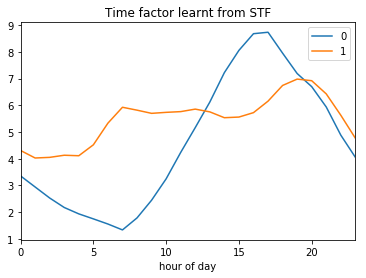

In [6]:
pd.DataFrame(hour).plot()
plt.title("Time factor learnt from STF")
plt.xlabel("hour of day")

Text(0.5,0,'hour of day')

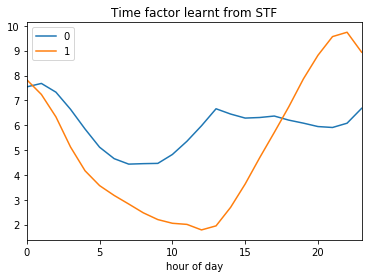

In [61]:
pd.DataFrame(hour).plot()
plt.title("Time factor learnt from STF")
plt.xlabel("hour of day")

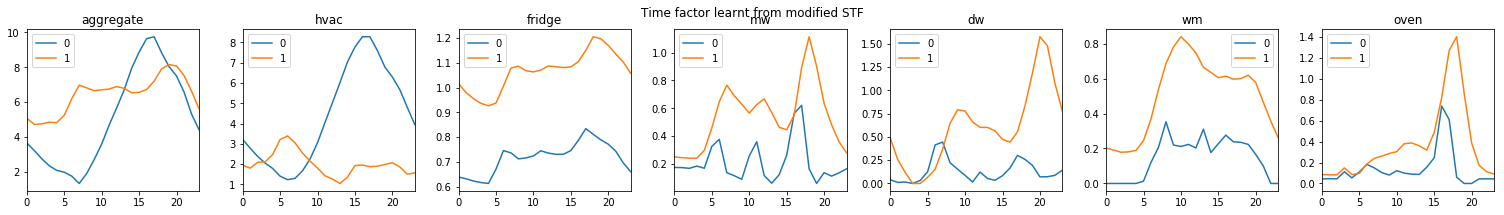

In [8]:
fig, ax = plt.subplots(ncols=7, figsize=(21, 3))
APPLIANCES_ORDER = ['aggregate', 'hvac', 'fridge', 'mw', 'dw', 'wm', 'oven']
for i, appliance in enumerate(APPLIANCES_ORDER):
    pd.DataFrame(hour_appliance[i]).plot(title=appliance, ax=ax[i])
plt.suptitle("Time factor learnt from modified STF")
plt.tight_layout()

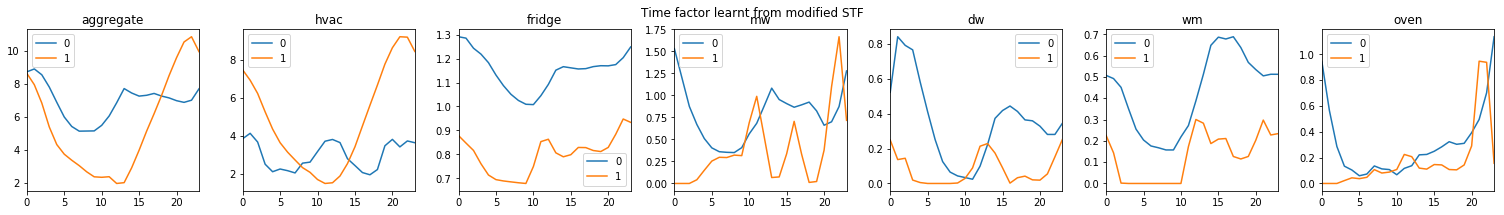

In [63]:
fig, ax = plt.subplots(ncols=7, figsize=(21, 3))
APPLIANCES_ORDER = ['aggregate', 'hvac', 'fridge', 'mw', 'dw', 'wm', 'oven']
for i, appliance in enumerate(APPLIANCES_ORDER):
    pd.DataFrame(hour_appliance[i]).plot(title=appliance, ax=ax[i])
plt.suptitle("Time factor learnt from modified STF")
plt.tight_layout()

In [6]:
np.nanmean(tensor, axis=0)[:, :, :].shape

/Users/nipunbatra/anaconda2/lib/python2.7/site-packages/autograd/core.py:69: RuntimeWarning: Mean of empty slice
  result_value = self.fun(*argvals, **kwargs)


(7, 365, 24)

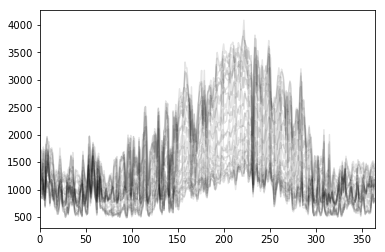

In [39]:
pd.DataFrame(np.nanmean(tensor, axis=0)[0, :, :]).plot(color='k', legend=False, alpha=0.1)

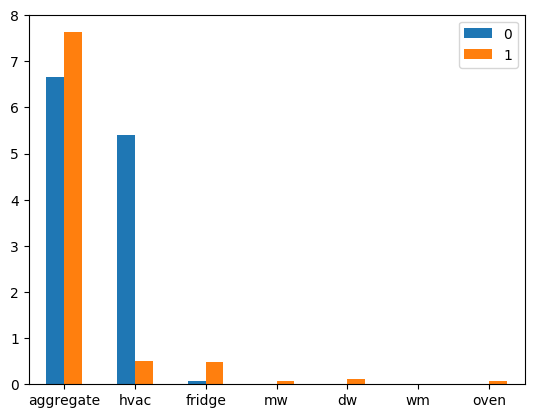

In [29]:
sns.reset_defaults()
from common import APPLIANCES_ORDER
pd.DataFrame(appliance, index=APPLIANCES_ORDER).plot(kind='bar',rot=0)

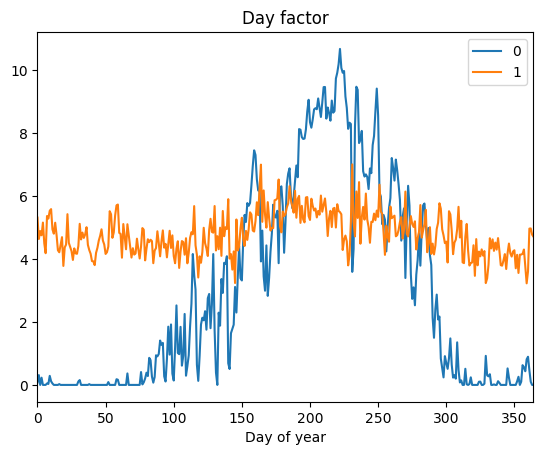

In [30]:
pd.DataFrame(day).plot()
plt.xlabel("Day of year")
plt.title("Day factor")

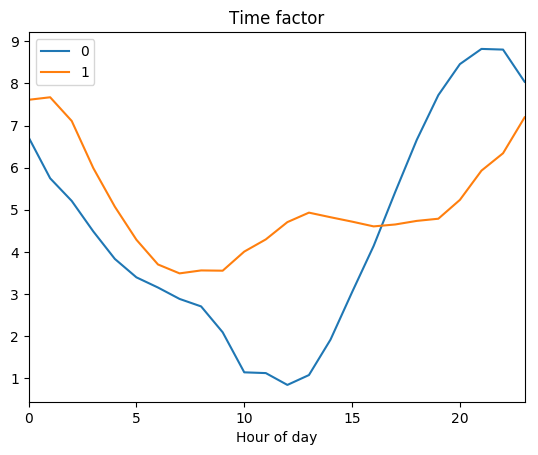

In [31]:
pd.DataFrame(hour).plot()
plt.xlabel("Hour of day")
plt.title("Time factor")

In [10]:
import seaborn as sns

In [59]:
tensor[:, 0, :, :].shape


(318, 365, 24)

In [22]:
labels[0].get_text()

u'364'

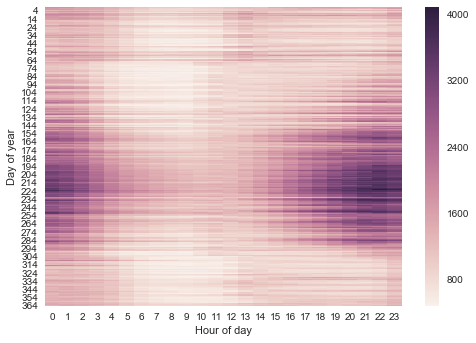

In [24]:
ax = sns.heatmap(np.nanmean(tensor[:, 0, :, :], axis=0))
labels = ax.get_yticklabels()
o = []
for i, x in enumerate(labels):
    if i%10==0:
        o.append(x.get_text())
    else:
        o.append(' ')

ax.set_yticklabels(o);
plt.xlabel("Hour of day")
plt.ylabel("Day of year")

In [56]:
%matplotlib inline

In [48]:
t = tensor[:20, :, :, :]
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
pred = np.zeros_like(t)
pred[:] = np.nan

for train, test in kf.split(t):
    print "*"*20, train, test
    t_copy = t.copy()
    t_copy[test][1:, :, :] = np.nan
    home, appliance, day, hour = stf_4dim(tensor=t_copy, r=2, num_iter=200, lr=2)
    pred[test] = np.einsum("Hr, Ar, Dr, Tr ->HADT", home, appliance, day, hour)[test]
   
    
    

******************** [ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [0 1 2 3]
920.948306858 0
418.718995597 200
418.713382716 400
418.708294084 600
418.705847477 800
******************** [ 0  1  2  3  8  9 10 11 12 13 14 15 16 17 18 19] [4 5 6 7]
920.948306858 0


KeyboardInterrupt: 

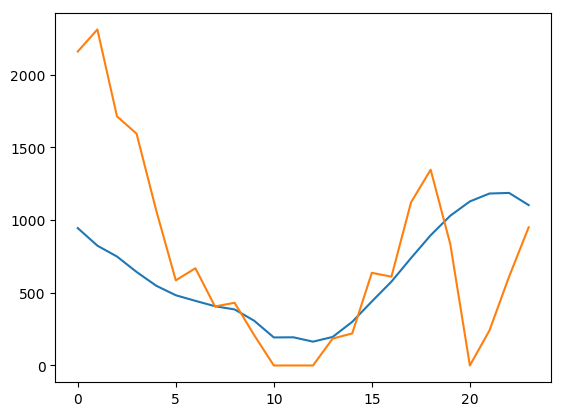

In [47]:
plt.plot(pred[0, 1, 190, :])
plt.plot(t[0, 1, 190, :])